In [177]:
import sympy as sp
import numpy as np
from prettytable import PrettyTable
import matplotlib.pyplot as plt
from scipy.integrate import odeint

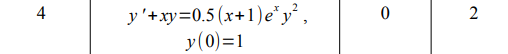

### Выбор шага интегрирования по методу Ренге-Кутта

In [178]:
x, y = sp.symbols('x y')
f = 0.5 * (x + 1) * sp.exp(x) * y**2 - x * y
a = 0
b = 0.89
y0 = 1
h = 0.1
epsilon = 0.0001
newTable = PrettyTable(["h", "np.abs(y1 - y1)/15"])
y1 = f.subs([(x, a + h), (y, b)])
y2 = f.subs([(x, a + 2*h), (y, b)])
newTable.add_row([h, np.abs(y1 - y2)/15])
while np.abs(y1 - y2)/15 < epsilon:
    h *= 2
    y1 = f.subs(x, a + h)
    y2 = f.subs(x, a + 2*h)
    newTable.add_row([h, np.abs(y1 - y2)/15])
print(newTable)
n = int((b - a)/h)+1
print(f"Количество шагов между {a} и {b}: {n}")
xi = a
x_arr = []
while xi < b:
    xi += h
    x_arr.append(xi)

+-----+----------------------+
|  h  |  np.abs(y1 - y1)/15  |
+-----+----------------------+
| 0.1 | 0.000667375901930393 |
+-----+----------------------+
Количество шагов между 0 и 0.89: 9


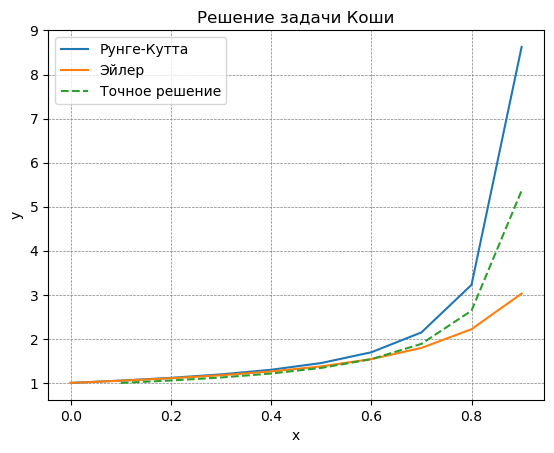

In [179]:
# Метод Рунге-Кутта
k1 = h * f.subs({x: x, y: y})
k2 = h * f.subs({x: x + h / 2, y: y + k1 / 2})
k3 = h * f.subs({x: x + h / 2, y: y + k2 / 2})
k4 = h * f.subs({x: x + h, y: y + k3})
y_next = y + (k1 + 2*k2 + 2*k3 + k4) / 6

# Определение метода Эйлера
y_euler = y + h * f

# Решение задачи Коши методом Рунге-Кутта


def runge_kutta_solution(a, b, y0, h_value):
    x_values = np.arange(a, b + h_value, h_value)
    y_values = [y0]

    for i in range(1, len(x_values)):
        y_next_value = y_next.subs({x: x_values[i - 1], y: y_values[i - 1], h: h_value, n: 1})
        y_values.append(y_next_value)

    return x_values, y_values


# Решение задачи Коши методом Эйлера
def euler_solution(a, b, y0, h_value):
    x_values = np.arange(a, b + h_value, h_value)
    y_values = [y0]

    for i in range(1, len(x_values)):
        y_euler_value = y_euler.subs({x: x_values[i - 1], y: y_values[i - 1], h: h_value, n: 1})
        y_values.append(y_euler_value)

    return x_values, y_values


# Точное решение для сравнения
def exact_solution(y, x):
    return 0.5 * (x + 1) * np.exp(x) * (y**2) - x * y


x_rk, y_rk = runge_kutta_solution(a, b, y0, h)
x_euler, y_euler = euler_solution(a, b, y0, h)
x_exact = x_arr
y_exact = odeint(exact_solution, y0, x_exact)

plt.plot(x_rk, y_rk, label='Рунге-Кутта')
plt.plot(x_euler, y_euler, label='Эйлер')
plt.plot(x_exact, y_exact, label='Точное решение', linestyle='dashed')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Решение задачи Коши')
plt.show()

In [180]:
newTable = PrettyTable(["x", "Ренге-Кутт", 'Эйлер', 'SymPy'])
for i in range(len(x_arr)):
    newTable.add_row([x_arr[i], y_rk[i], y_euler[i], y_exact[i]])
print(newTable)

+---------------------+------------------+------------------+--------------+
|          x          |    Ренге-Кутт    |      Эйлер       |    SymPy     |
+---------------------+------------------+------------------+--------------+
|         0.1         |        1         |        1         |     [1.]     |
|         0.2         | 1.05310383204227 | 1.05000000000000 | [1.05520096] |
| 0.30000000000000004 | 1.11545055800891 | 1.10651480154481 | [1.12323069] |
|         0.4         | 1.19359484813670 | 1.17411180607773 | [1.21302519] |
|         0.5         | 1.29864738144108 | 1.25984255663335 | [1.34067763] |
|         0.6         | 1.45130109317690 | 1.37519688679282 | [1.53885932] |
|         0.7         | 1.69558837372021 | 1.54028752228804 | [1.88662111] |
|  0.7999999999999999 | 2.14606025973539 | 1.79370632766436 | [2.63973195] |
|  0.8999999999999999 | 3.22606383793063 | 2.21886294711185 | [5.36435681] |
+---------------------+------------------+------------------+--------------+